In [1]:
import numpy as np

# Define a simple Point class
class Point:
    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.prev_position = np.array(position, dtype=float)
        self.acceleration = np.array([0, 0], dtype=float)

# Define a Link class to enforce constraints
class Link:
    def __init__(self, p1, p2, length):
        self.p1 = p1
        self.p2 = p2
        self.length = length

    def enforce(self):
        # Calculate current distance and difference
        delta = self.p2.position - self.p1.position
        current_length = np.linalg.norm(delta)
        difference = (current_length - self.length) / current_length
        
        # Adjust positions to satisfy the constraint
        self.p1.position += delta * 0.5 * difference
        self.p2.position -= delta * 0.5 * difference

# Initialize points
p1 = Point([0, 0])
p2 = Point([1, 0])
p3 = Point([2, 0])

# Define links with constraints
link1 = Link(p1, p2, 1)
link2 = Link(p2, p3, 1)

# Simulation parameters
time_step = 0.1
steps = 100

# Main simulation loop
for _ in range(steps):
    # Verlet Integration
    for p in [p1, p2, p3]:
        temp = np.copy(p.position)
        p.position += (p.position - p.prev_position) + p.acceleration * time_step**2
        p.prev_position = temp
    
    # Constraint Solving
    for _ in range(5):  # Iterate to better enforce constraints
        link1.enforce()
        link2.enforce()

    # Here you could add rendering or logging of positions

# Example: Print final positions
print(f"P1: {p1.position}, P2: {p2.position}, P3: {p3.position}")

P1: [0. 0.], P2: [1. 0.], P3: [2. 0.]


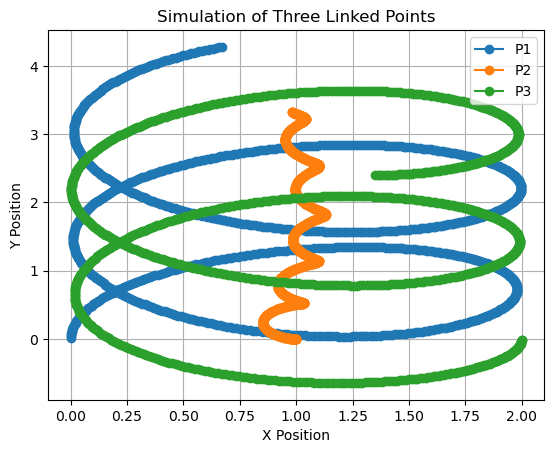

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the Point and Link classes are defined as in the previous example

# Initialize points with positions
p1 = Point([0, 0])
p2 = Point([1, 0])
p3 = Point([2, 0])

# Introduce initial velocities
initial_velocities = [[0.1, 0.2], [-0.1, 0], [0, -0.1]]  # Example velocities for p1, p2, p3
for p, v in zip([p1, p2, p3], initial_velocities):
    p.prev_position = p.position - np.array(v) * time_step

# Define links with constraints
link1 = Link(p1, p2, 1)
link2 = Link(p2, p3, 1)

# Simulation parameters
time_step = 0.1
steps = 1000

# For plotting
positions = [[], [], []]  # To store positions for p1, p2, p3

# Main simulation loop
for _ in range(steps):
    # Verlet Integration
    for p in [p1, p2, p3]:
        temp = np.copy(p.position)
        p.position += (p.position - p.prev_position) + p.acceleration * time_step**2
        p.prev_position = temp

    # Constraint Solving
    for _ in range(5):  # Iterate to better enforce constraints
        link1.enforce()
        link2.enforce()

    # Store positions for plotting
    for i, p in enumerate([p1, p2, p3]):
        positions[i].append(p.position.copy())

# Plotting
for i, pos in enumerate(positions):
    x, y = zip(*pos)
    plt.plot(x, y, marker='o', label=f'P{i+1}')

plt.legend()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Simulation of Three Linked Points')
plt.grid(True)
plt.show()

In [7]:
%matplotlib qt
import matplotlib.animation as animation

# Create a figure and axis
fig, ax = plt.subplots()

# Set axis limits
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 0.5)

# Initialize empty line objects for each point
lines = [ax.plot([], [], marker='o')[0] for _ in range(3)]

# Animation update function
def update(frame):
    # Update the positions of the points
    for i, line in enumerate(lines):
        line.set_data(positions[i][frame])

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(positions[0]), interval=50)

# Display the animation
plt.show()


/tmp/ipykernel_803863/3701435235.py:18: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(positions[i][frame])


In [1]:
import numpy as np

# Define the acceleration function
def acceleration(x):
    # This is a placeholder for the actual acceleration calculation.
    # For example, for a simple harmonic oscillator: a = -k * x
    return -k * x

# Initial conditions
x0 = 1.0  # Initial position
v0 = 0.0  # Initial velocity
k = 1.0   # Spring constant for the harmonic oscillator example
dt = 0.01 # Time step
T = 10    # Total time

# Initialization
n_steps = int(T / dt)
x = np.zeros(n_steps)
v = np.zeros(n_steps)
x[0] = x0
v[0] = v0

# First step using Euler to get x[1]
x[1] = x0 + v0 * dt + 0.5 * acceleration(x0) * dt**2

# Verlet integration loop
for i in range(1, n_steps-1):
    x[i+1] = 2*x[i] - x[i-1] + acceleration(x[i]) * dt**2

# Now, x contains the position of the particle at each time step


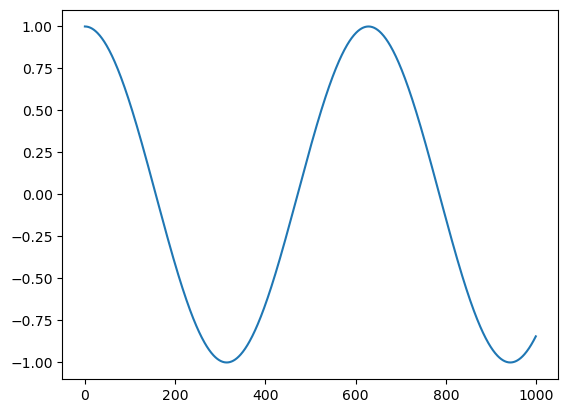

In [2]:
import matplotlib.pyplot as plt

plt.plot(x)

In [1]:
import numpy as np
N = 1000
dt  = 0.1 
x = np.zeros(N)
v = np.zeros(N)
t = np.arange(0,(N+0.5)*dt, dt)
a = np.ones(N)*1.0  # initial condition
x[[0,1]] = 1
v[1] = v[0]+a[0]*dt

for i in range (1,N-1):
    x[i+1] = x[i]+v[i]*dt+(a[i]*(dt**2)*0.5)
    v[i+1] = v[i] + a[i]*dt

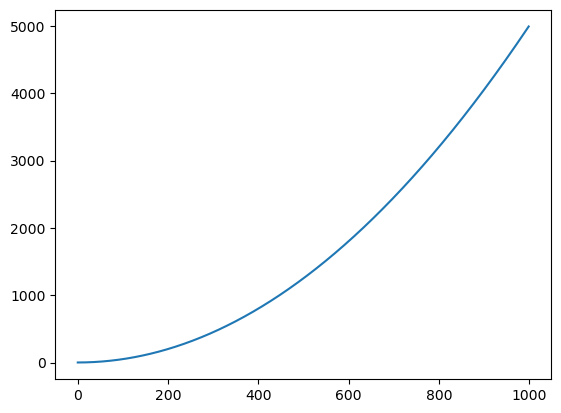

In [2]:
import matplotlib.pyplot as plt

plt.plot(x)


In [1]:
import numpy as np

def verlet_scheme(initial_position, velocity, dt, num_steps):
    """
    Implements the Verlet integration scheme for a constant velocity field.
    
    Parameters:
    initial_position (np.array): Initial position of the particle (x0, y0, z0)
    velocity (np.array): Constant velocity of the particle (vx, vy, vz)
    dt (float): Time step for the integration
    num_steps (int): Number of steps to integrate
    
    Returns:
    np.array: Array of positions at each time step
    """
    
    # Initialize position array
    positions = np.zeros((num_steps, 3))
    positions[0] = initial_position
    
    # Initial position is just the initial position
    # For Verlet, we need the position at t-dt, which we can initialize
    # using the first position and the velocity backward in time
    previous_position = initial_position - velocity * dt
    
    # Compute the next position using the Verlet scheme
    for step in range(1, num_steps):
        # Current position
        current_position = positions[step-1]
        
        # Verlet integration for constant velocity
        next_position = 2 * current_position - previous_position + velocity * (dt ** 2)
        
        # Update positions
        positions[step] = next_position
        previous_position = current_position
        
    return positions

# Example usage
initial_position = np.array([0.0, 0.0, 0.0])  # Initial position (x0, y0, z0)
velocity = np.array([1.0, 0.5, 0.25])        # Constant velocity (vx, vy, vz)
dt = 0.01                                    # Time step
num_steps = 1000                             # Number of integration steps

positions = verlet_scheme(initial_position, velocity, dt, num_steps)

# Print the first 10 positions
print(positions[:10])

[[0.       0.       0.      ]
 [0.0101   0.00505  0.002525]
 [0.0203   0.01015  0.005075]
 [0.0306   0.0153   0.00765 ]
 [0.041    0.0205   0.01025 ]
 [0.0515   0.02575  0.012875]
 [0.0621   0.03105  0.015525]
 [0.0728   0.0364   0.0182  ]
 [0.0836   0.0418   0.0209  ]
 [0.0945   0.04725  0.023625]]
